In [4]:
import pandas as pd
import numpy as np
from rdkit import Chem
from rdkit.Chem import Draw
import sys
sys.path.append('../')
from descriptors.preprocessing import preprocess, dict_ligand
from descriptors.dictionnaries import dict_smiles_catalysts


In [6]:
df_dft = pd.read_csv("../data/NiCOlit.csv", sep = ',')
df_dft, indexes = preprocess(df_dft)
indexes_dft = []
for idx in df_dft.index:
    indexes_dft.append(idx)
nicolit = df_dft.reset_index(drop=True)

In [7]:
catalysts = list(nicolit.catalyst_precursor.unique())
catalysts = [ prec if prec == prec else 'NO' for prec in catalysts]
catalysts.remove('NO')

In [8]:
mols_list = [Chem.MolFromSmiles(dict_smiles_catalysts[prec]) for prec in catalysts]
len(mols_list)

57

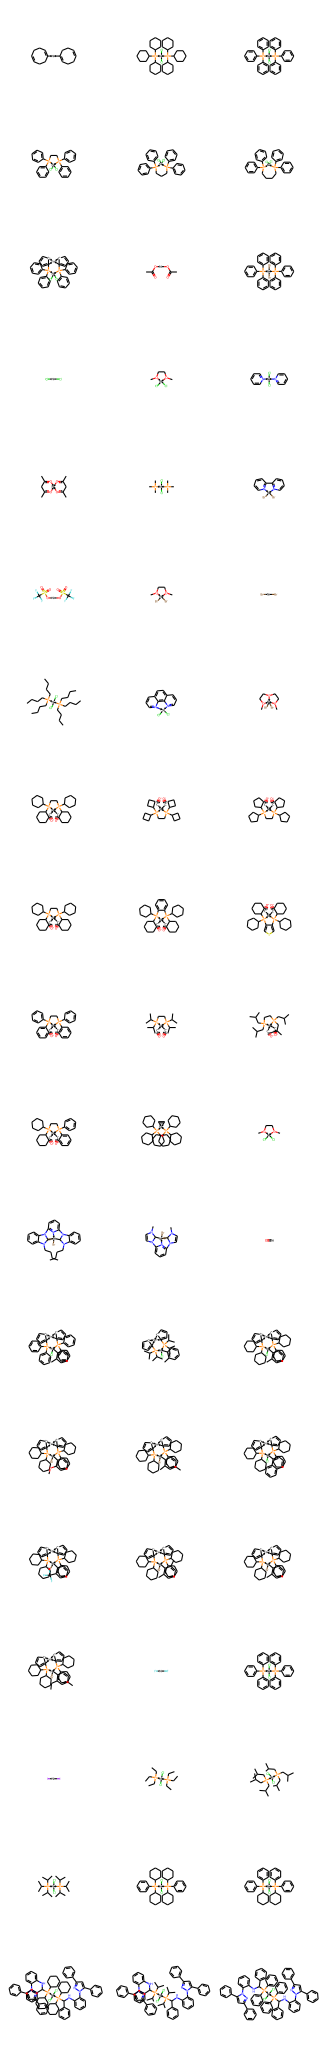

In [9]:
Draw.MolsToGridImage(mols_list, 
                     maxMols=100, useSVG=True, molsPerRow=3)

In [11]:
img = Draw.MolsToGridImage(mols_list[:6], 
                     maxMols=100, useSVG=True, molsPerRow=3)

filename = str('../images/prec_0.svg')

with open(filename, 'w') as f:
    f.write(img.data)